## Clustering Analysis

## Data Preprocessing:
## 1.Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors

from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [3]:
# loading dataset
df=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
df.shape

(3999, 12)

In [4]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
# checking for null values
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
# checking for duplicates
df.duplicated().sum()

np.int64(0)

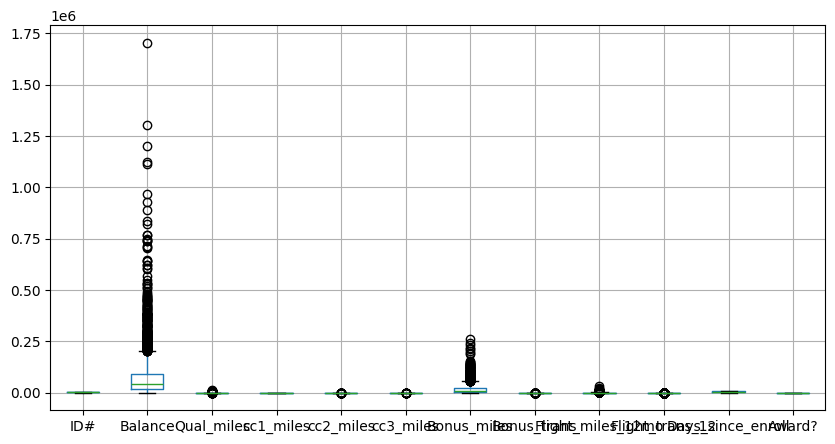

In [8]:
#ploting Boxplot to identify and remove outliers
df.boxplot(figsize=(10,5))
plt.show()

In [9]:
#removing outliers

def outlier_cappin(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extrem=Q1-1.5*IQR
    upper_extrem=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x:lower_extrem if x<lower_extrem else upper_extrem if x>upper_extrem else x)


for col in df.select_dtypes(['int','float']).columns:
    outlier_cappin(df,col)


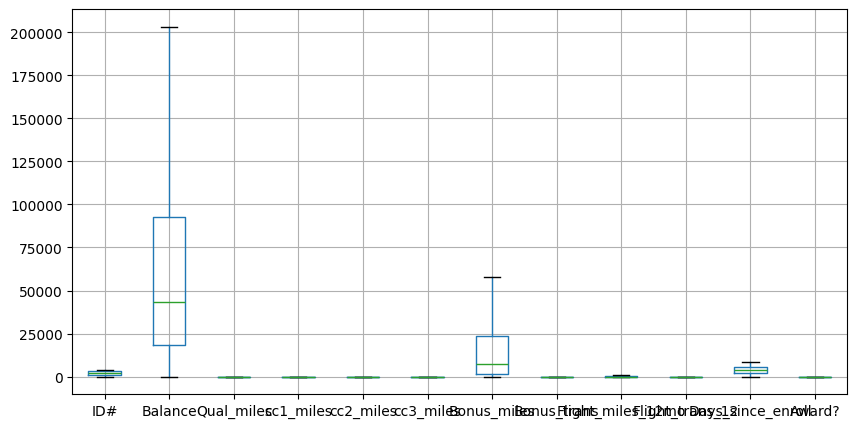

In [10]:
## after removing outliers
df.boxplot(figsize=(10,5))
plt.show()

In [11]:
# applying satndard scaler
scaler=StandardScaler()
sca_data=scaler.fit_transform(df)
sca_data

array([[-1.73512503, -0.60725829,  0.        , ..., -0.62614341,
         1.39545434, -0.7669193 ],
       [-1.73426342, -0.75894657,  0.        , ..., -0.62614341,
         1.37995704, -0.7669193 ],
       [-1.73340181, -0.38206963,  0.        , ..., -0.62614341,
         1.41192021, -0.7669193 ],
       ...,
       [ 1.72682006,  0.1675298 ,  0.        , ..., -0.62614341,
        -1.31560393,  1.30391816],
       [ 1.72768167, -0.15118775,  0.        , ...,  0.43238439,
        -1.31608822, -0.7669193 ],
       [ 1.72854328, -1.03556163,  0.        , ..., -0.62614341,
        -1.31754109, -0.7669193 ]])

## 2.Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.

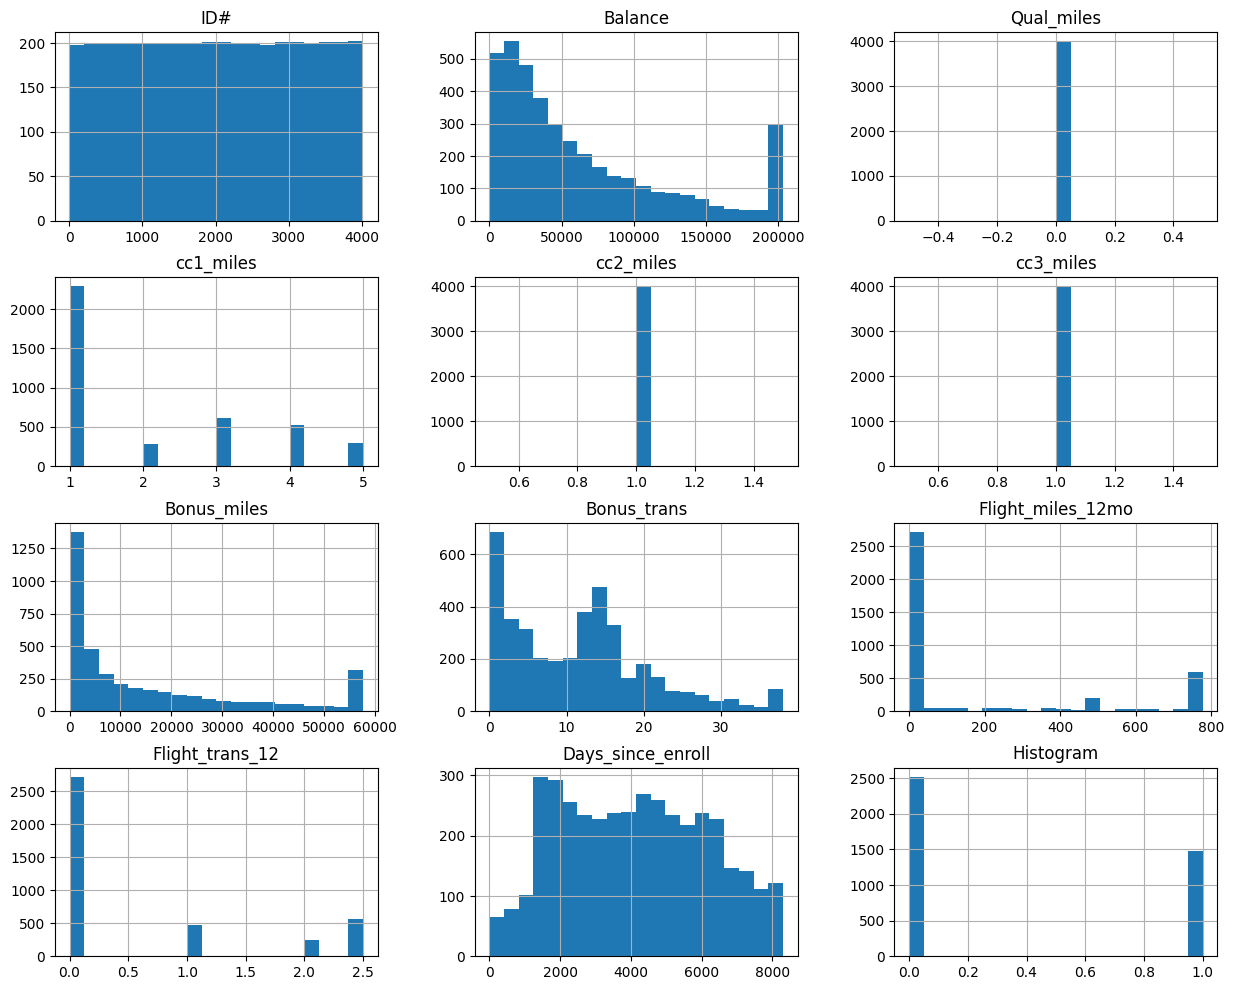

In [12]:
# ploting histogram
df.hist(bins=20,figsize=(15,12))
plt.title("Histogram")
plt.show()

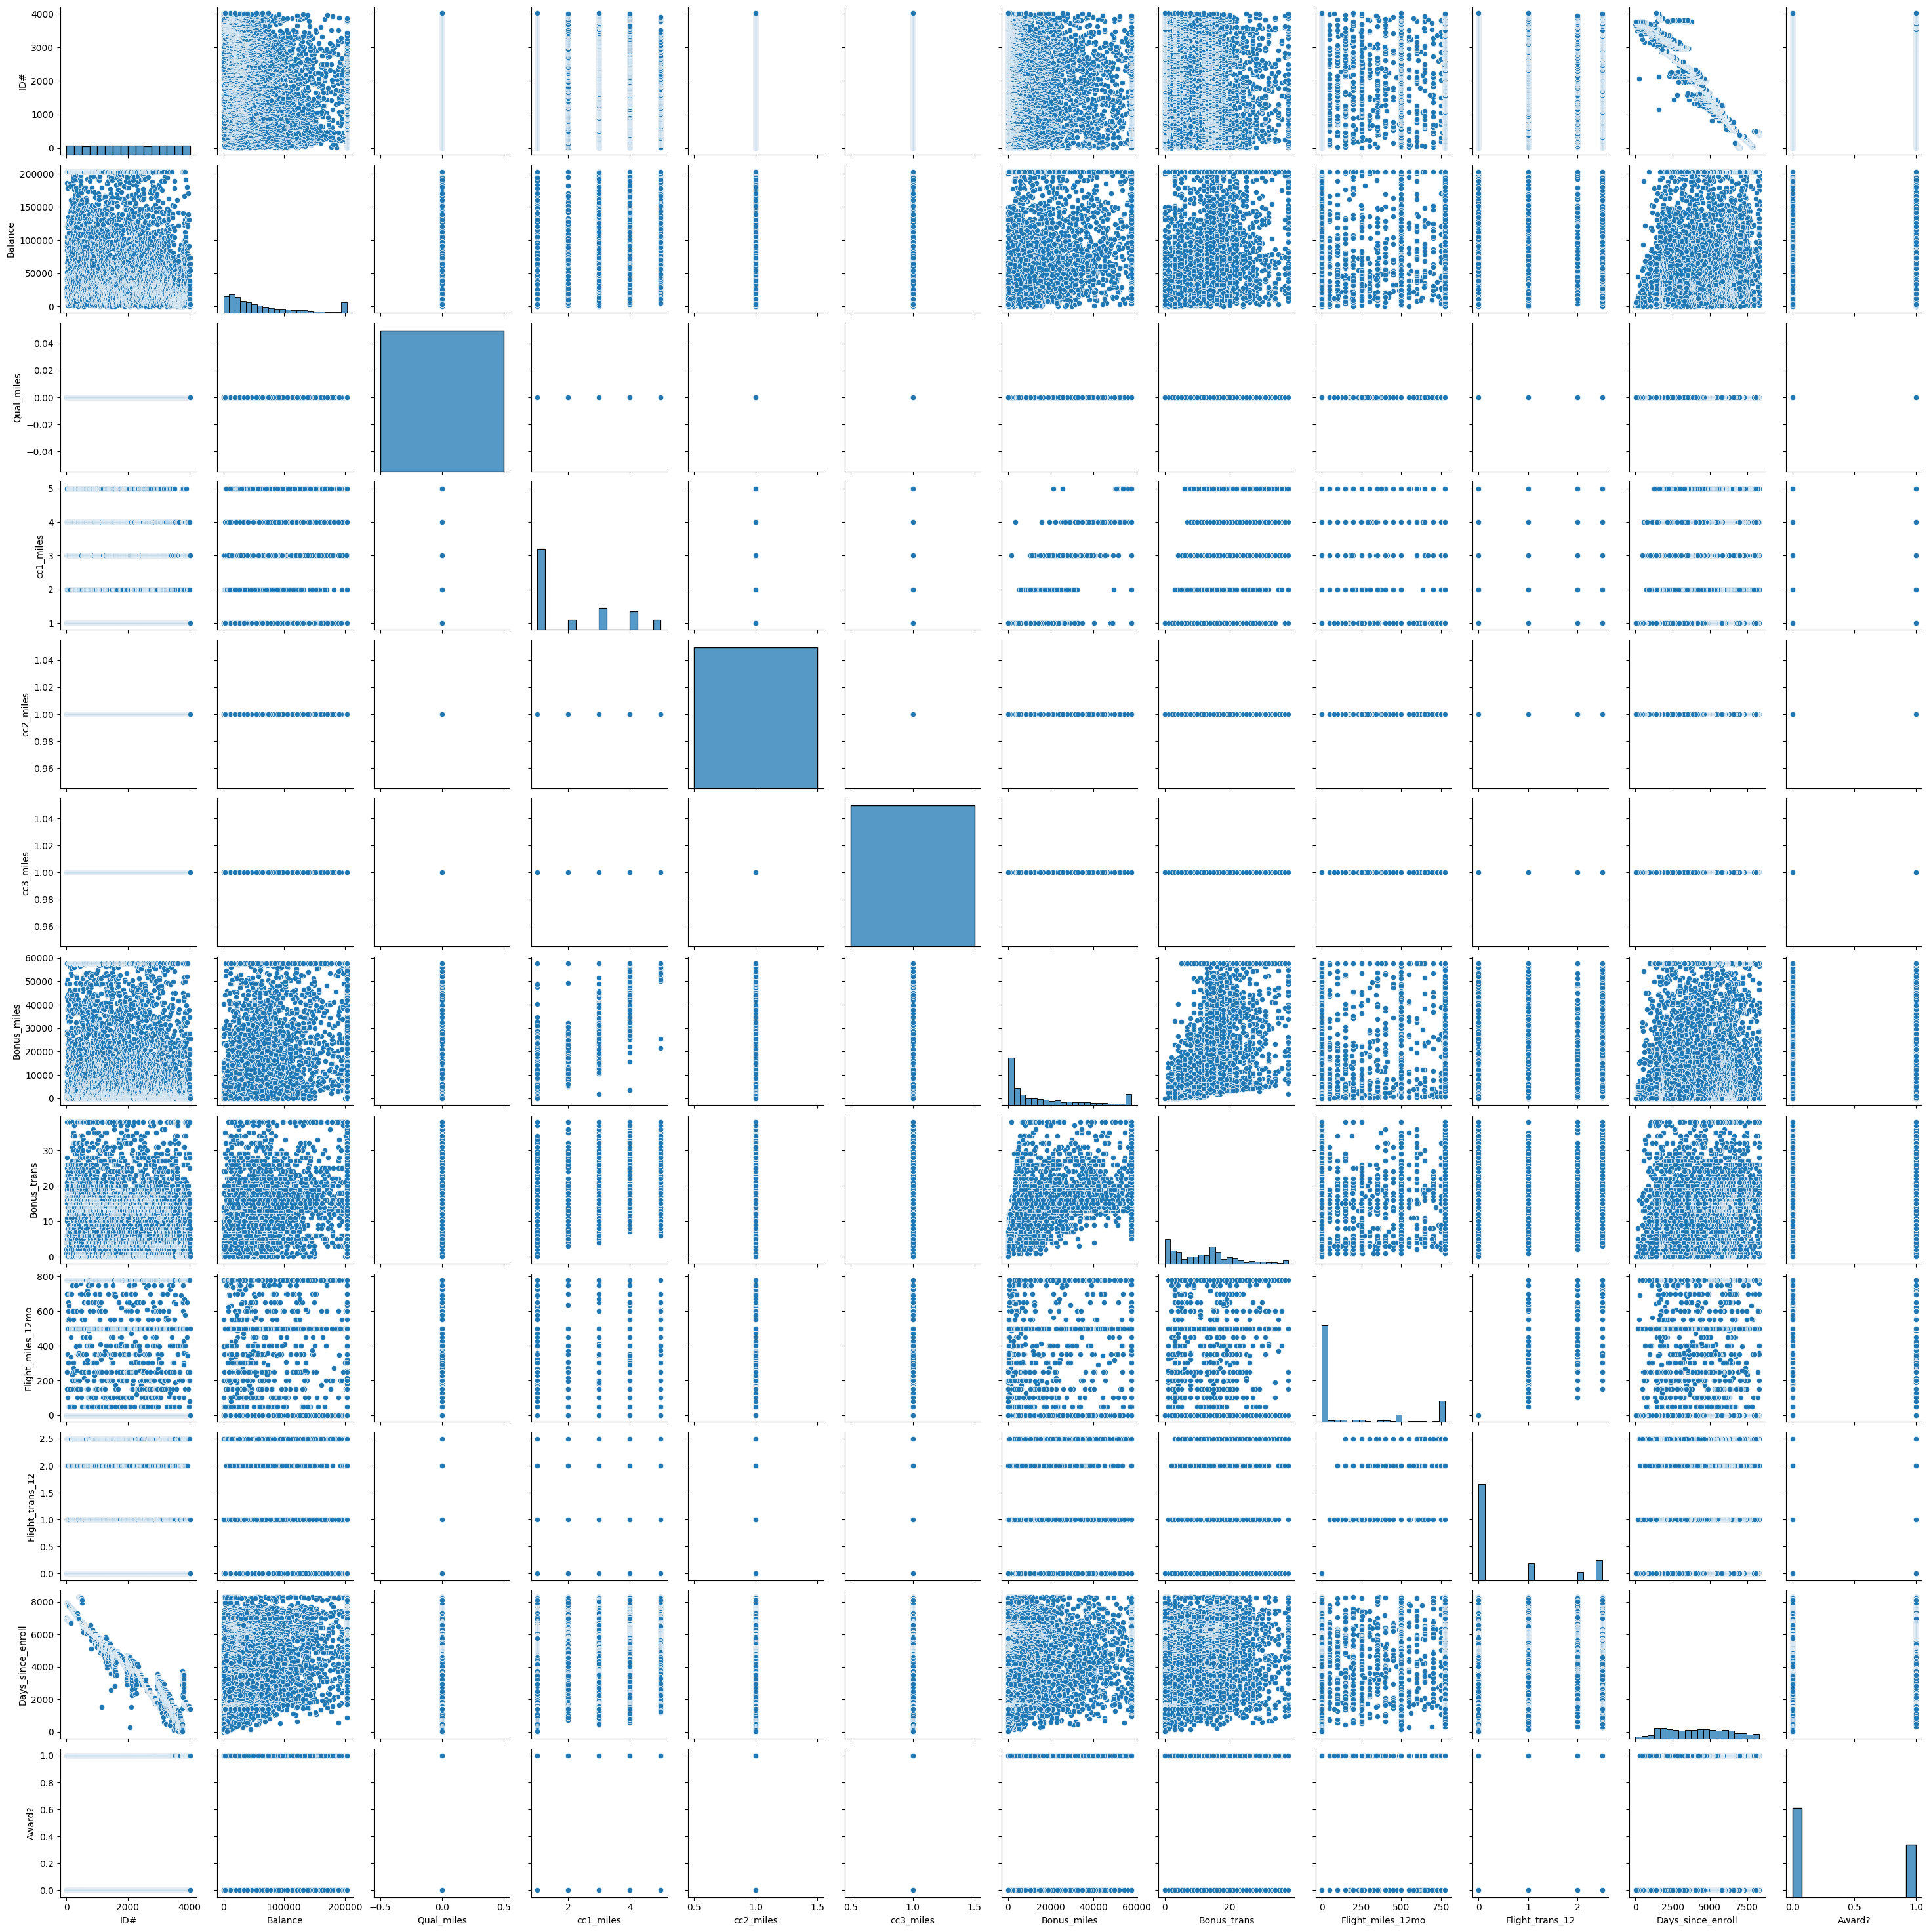

In [13]:
sns.pairplot(df)
plt.show()

## Implementing Clustering Algorithms:

## Implement the K-Means and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn

In [14]:

wcss=[]
for i in range(1,13):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(sca_data)
    wcss.append(kmeans.inertia_)

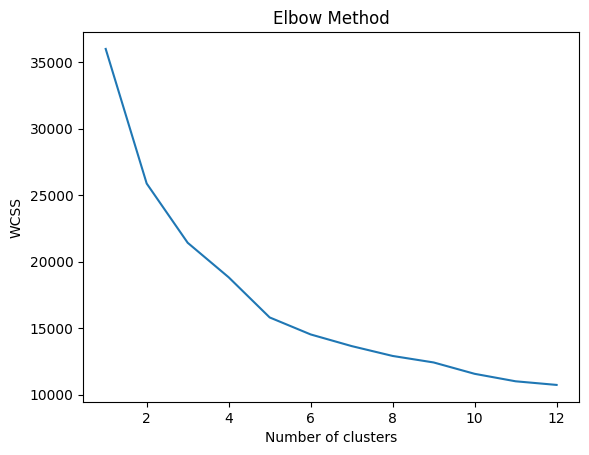

In [15]:
# Ploting the Elbow curve
plt.plot(range(1, 13), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
# Based on the Elbow curve, choose the optimal number of clusters and fit K-Means
optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(sca_data)
kmeans_labels = kmeans.labels_

## Experiment with different parameter settings for K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

In [17]:
## Hierarchical Clustering
agglomerative = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
agglomerative_labels = agglomerative.fit_predict(sca_data)
agglomerative_labels

array([0, 0, 0, ..., 0, 2, 0])

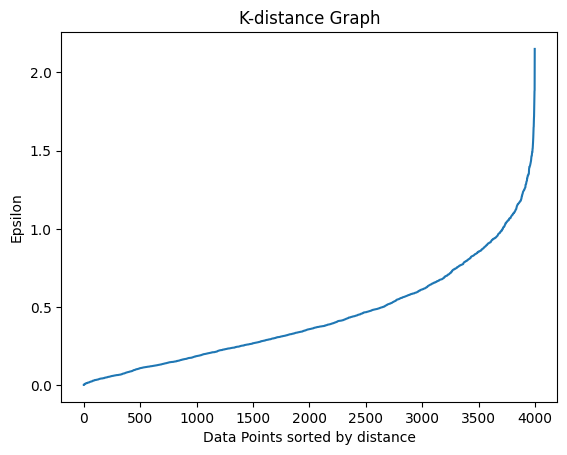

In [18]:
## DBSCAN
# Find optimal epsilon using NearestNeighbors
nn = NearestNeighbors(n_neighbors=2)
nn.fit(sca_data)
distances, indices = nn.kneighbors(sca_data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

In [19]:
epsilon = 0.5
dbscan = DBSCAN(eps=epsilon, min_samples=5)
dbscan_labels = dbscan.fit_predict(sca_data)
dbscan_labels

array([ 0,  0,  0, ..., -1, 31,  0])

## Cluster Analysis and Interpretation:

In [20]:
# K-Means produced well-separated clusters representing high, medium, and low customer engagement groups. This helps in designing clear customer segmentation strategies.
# DBSCAN detected special high-value groups and noise points, revealing outliers that K-Means failed to identify.
# Together, these algorithms give complementary insights:
# K-Means → useful for overall segmentation
# DBSCAN → useful for detecting dense groups and unusual customer behaviors

## Visualization:
## Visualize the clustering results using scatter plots or other suitable visualization techniques.Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.

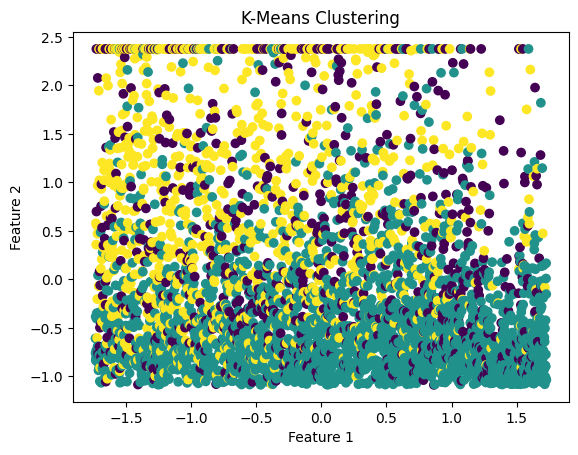

In [21]:
# Plot the clusters using scatter plot
plt.scatter(sca_data[:, 0], sca_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

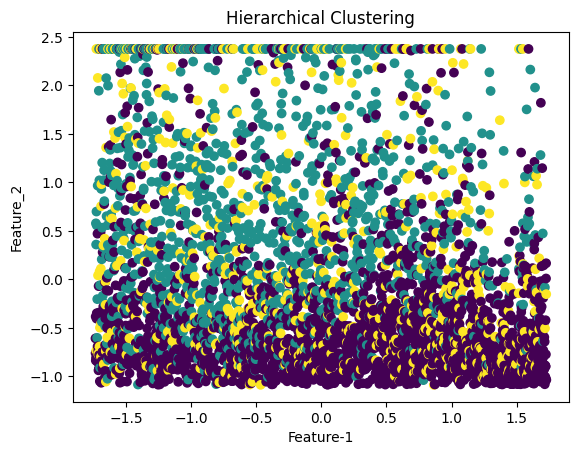

In [22]:
plt.scatter(sca_data[:,0],sca_data[:,1],c=agglomerative_labels)
plt.title('Hierarchical Clustering')
plt.xlabel('Feature-1')
plt.ylabel('Feature_2')
plt.show()

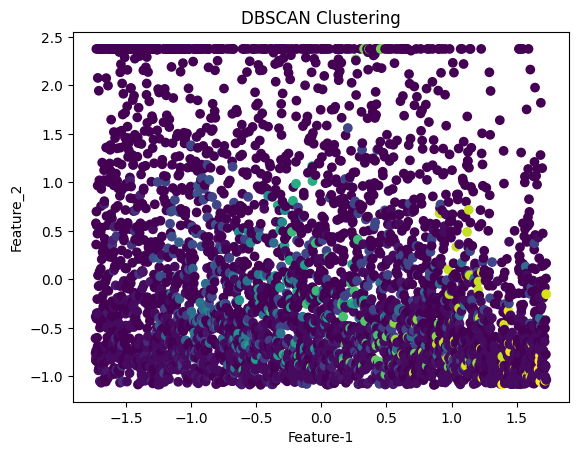

In [23]:
plt.scatter(sca_data[:,0],sca_data[:,1],c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature-1')
plt.ylabel('Feature_2')
plt.show()

## Evaluation and Performance Metrics:
## Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.

In [24]:
from sklearn.metrics import silhouette_score

In [25]:
# Silhouette score for DBSCAN
kmeans_silhouette_score=silhouette_score(sca_data,kmeans_labels)
print("kmeans_silhouette_score:",kmeans_silhouette_score)

kmeans_silhouette_score: 0.29983062587039727


In [26]:
# Silhouette score for DBSCAN
dbscan_labels_silhouette_score = silhouette_score(sca_data, dbscan_labels)
print("dbscan_labels_silhouette_score:",dbscan_labels_silhouette_score)

dbscan_labels_silhouette_score: -0.2896092342309267


In [27]:
# Silhouette score for Hierarchical Clustering
am_silhouette_score = silhouette_score(sca_data, agglomerative_labels)
print("Hierarchical Clustering Silhouette Score:",agglomerative_labels )

Hierarchical Clustering Silhouette Score: [0 0 0 ... 0 2 0]
